In [1]:
using PyPlot; using Revise; using MDToolbox;
PyPlot.plt[:style][:use]("seaborn-colorblind");
ENV["COLUMNS"] = 110; #display width for MDToolbox

In [2]:
ta = readnetcdf("data/md_alad/3_prod/run.nc")

50000x22 TrjArray
|    25.57    24.99     7.55 |    25.03    25.63     6.86 |  …      26.82    26.54     0.76 |
|    24.99    22.78     4.99 |    25.84    23.09     5.60 |         26.45    24.56     0.51 |
|    28.05    23.02     5.63 |    27.10    23.54     5.54 |         28.50    25.51     0.18 |
|    25.88    23.94     5.44 |    26.89    23.85     5.07 |         30.85    25.22     0.24 |
|    25.10    23.44     5.51 |    26.19    23.48     5.40 |         27.93    24.55    -0.42 |
|    26.18    23.36     6.71 |    25.52    23.83     5.98 |  …      25.89    25.41     0.56 |
|    27.35    24.42     6.15 |    26.94    25.33     5.70 |         27.10    25.58    -1.07 |
|    27.96    25.70     6.42 |    27.42    26.35     5.73 |         27.43    27.94    -0.78 |
|    27.66    26.07     7.45 |    27.17    26.20     6.49 |         27.72    30.03     0.83 |
|    25.66    26.31     7.06 |    25.58    26.02     6.01 |         27.46    30.45     3.30 |
|    25.62    28.13     6.89 |    25.50   

In [3]:
phi = calcdihedral(ta[:, 5], ta[:, 7], ta[:, 9], ta[:, 15]);
psi = calcdihedral(ta[:, 7], ta[:, 9], ta[:, 15], ta[:, 17]);

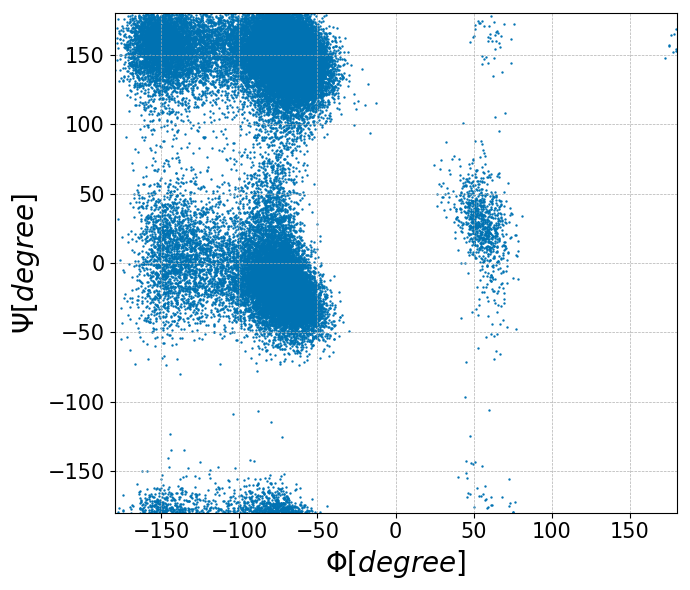

In [4]:
fig, ax = subplots(figsize=(7, 6));
ax[:scatter](phi, psi, s=0.5);
xlabel(L"\Phi [degree]",fontsize=20);
ylabel(L"\Psi [degree]",fontsize=20);

# detailed options (not necessary, just for reference)
ax[:set](xlim=[-180, 180], ylim=[-180, 180]);
ax[:xaxis][:set_tick_params](which="major",labelsize=15);
ax[:yaxis][:set_tick_params](which="major",labelsize=15);
ax[:grid](linestyle="--", linewidth=0.5);
tight_layout();

savefig("free_energy_surface1.png", dpi=350);

In [5]:
grid_x = -180:1:180;
grid_y = -180:1:180;
pmf, grid_x, grid_y = calcpmf(phi, psi, grid_x=grid_x, grid_y=grid_y, bandwidth=[2.0, 2.0], boxsize=[360.0, 360.0]);
#KBT = 300.0 * KB_KCALPERMOL
KBT = 0.6
pmf = KBT .* pmf;

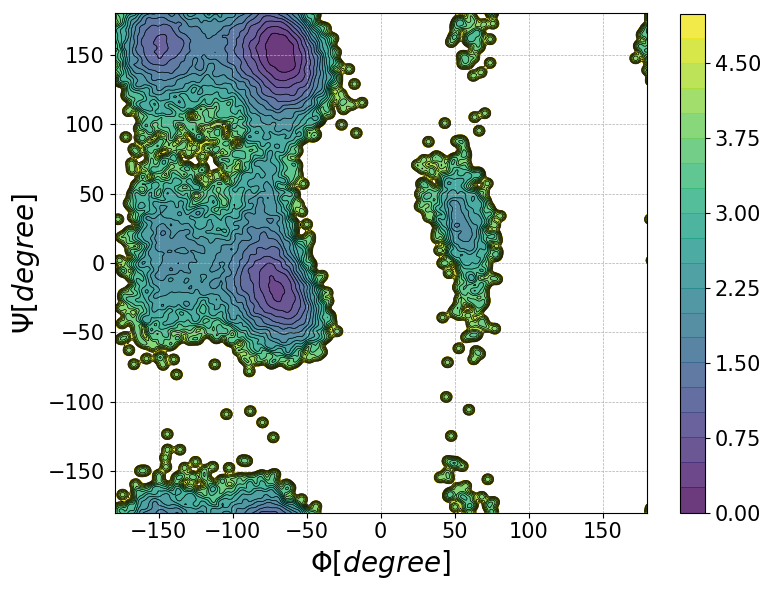

In [6]:
fig, ax = subplots(figsize=(8, 6));
meshgrid(x, y) = (repeat(x', length(y), 1), repeat(y, 1, length(x)));
X, Y = meshgrid(grid_x, grid_y);
levels = 0:0.25:5;
ax[:contour](X, Y, pmf, levels, colors="black", alpha=1.0, linewidths=0.5);
pos = ax[:contourf](X, Y, pmf, levels, alpha=0.8, cmap=get_cmap("viridis")) # colormaps: viridis, plasma, inferno, magma, jet, hsv, terrain
cbar = fig[:colorbar](pos, ax=ax);
cbar[:ax][:tick_params](labelsize=15);
xlabel(L"\Phi [degree]",fontsize=20);
ylabel(L"\Psi [degree]",fontsize=20);

# detailed options (not necessary, just for reference)
ax[:set](xlim=[-180, 180], ylim=[-180, 180]);
ax[:tick_params](axis="both", which="major",labelsize=15);
ax[:grid](linestyle="--", linewidth=0.5);
tight_layout();

savefig("free_energy_surface2.png", dpi=350, bbox_inches="tight");